In [22]:
# 라이브러리 
import numpy as np                                                    # 다차원 배열 및 행렬 연산을 위한 라이브러리
import tensorflow as tf                                               # 딥러닝 프레임워크 텐서플로우
from tensorflow.keras.preprocessing.image import ImageDataGenerator   # 이미지 데이터 전처리를 위한 클래스
import matplotlib.pylab as plt

In [23]:
# 압축 해제 
import shutil                                                          # 파일 압축 해제를 위한 라이브러리
shutil.unpack_archive("/aiffel/aiffel/10node_project/APPLE.zip", "")   # 지정된 경로의 압축 파일을 해제 

In [24]:
# 경로
train_path = "train/"           # 학습 데이터 경로
valid_path = "validation/"      # 검증 데이터 경로 
print(train_path)               # 학습 데이터 경로 출력
print(valid_path)               # 검증 데이터 경로 출력

train/
validation/


In [25]:
# 이미지 데이터 제너레이터
image_gen = ImageDataGenerator(rescale=(1/255.))    # 이미지 데이터 전처리를 위한 제너레이터 생성
image_gen                                           # 생성한 이미지 데이터 제너레이터 출력  

In [26]:
# flow_from_directory 함수로 폴더에서 이미지 가져옴

#학습 데이터 가져오기
train_gen = image_gen.flow_from_directory(train_path,                  # 학습 데이터가 있는 폴더 경로
                                          batch_size=32,               # 한 번에 가져올 이미지의 개수
                                          target_size=(96, 96),        # 이미지의 크기를 지정
                                          classes=['good','bad'],      # 클래스 라벨 지정
                                          class_mode = 'binary',       # 이진 분류 설정
                                          seed=0)                      # 랜덤 시드 설정

#검증 데이터 가져오기
valid_gen = image_gen.flow_from_directory(valid_path,                  # 검증 데이터가 있는 폴더 경로                               
                                          batch_size=32, 
                                          target_size=(96, 96),   
                                          classes=['good','bad'], 
                                          class_mode = 'binary',
                                          seed=0)

Found 693 images belonging to 2 classes.
Found 105 images belonging to 2 classes.


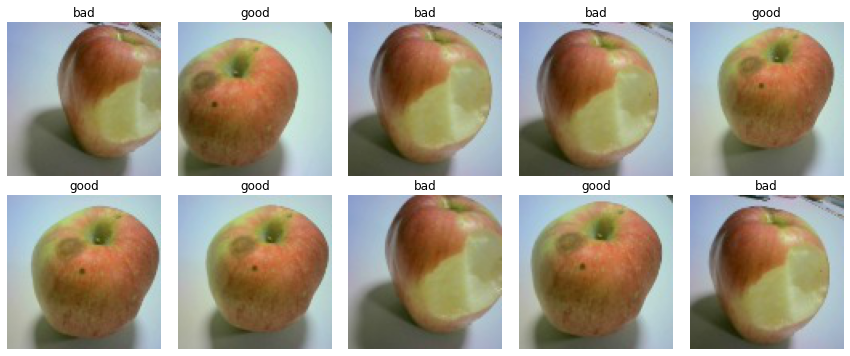

In [27]:
# 샘플 이미지 출력
class_labels = ['good','bad']                          # 클래스 라벨 설정
batch = next(train_gen)                                # 학습 데이터에서 다음 배치 가져오기
images, labels = batch[0], batch[1]             

plt.figure(figsize=(12, 5))                            # 이미지 출력 설정
for i in range(10):                                   # 2행 5열로 이미지 배치
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(images[i])                             # 이미지 출력
    plt.title(class_labels[labels[i].astype(int)])    # 라벨에 해당하는 클래스명 출력
    plt.axis("off")                                   # 축 숨김
plt.tight_layout()                                    # 레이아웃 조절
plt.show()

In [35]:
# 모델 정의
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential

model = Sequential([                                               # Sequential 모델 생성
                    tf.keras.layers.BatchNormalization(),          # BatchNormalization 층 추가
                    Conv2D(16, (3, 3), activation='relu'),         # 3x3 크기의 16개 필터를 가진 Conv2D 층, 활성화 함수는 'relu'
                    MaxPooling2D((2, 2)),                          # 2x2 크기의 풀링 층
                    Flatten(),                                     # 데이터를 일차원으로 펼치는 Flatten 층
                    Dense(64, activation='relu'),                  # 64개 뉴런을 가진 Dense 층, 활성화 함수는 'relu'
                    Dropout(0.5),                                  # 50%의 드롭아웃을 가진 Dropout 층
                    Dense(1, activation='sigmoid')                 # 1개 뉴런을 가진 Dense 층, 활성화 함수는 'sigmoid' (이진 분류)
])

In [29]:
# 모델 컴파일
model.compile(optimizer='adam',                     # 옵티마이저로 Adam 사용
              loss='binary_crossentropy',           # 이진 분류 문제이므로 binary_crossentropy 손실 함수 사용
              metrics=['accuracy'])                 # 정확도를 측정

# 모델 훈련
history = model.fit(train_gen, validation_data=valid_gen, epochs=3) # 훈련 데이터 제너레이터 사용
                                                                    # 검증 데이터 제너레이터 사용
                                                                    # 3 에포크 동안 훈련

Epoch 1/3
22/22 [==============================] - 7s 299ms/step - loss: 0.2464 - accuracy: 0.9278 - val_loss: 0.0993 - val_accuracy: 0.9524
Epoch 2/3
22/22 [==============================] - 6s 291ms/step - loss: 0.0107 - accuracy: 0.9928 - val_loss: 0.1103 - val_accuracy: 1.0000
Epoch 3/3
22/22 [==============================] - 6s 291ms/step - loss: 0.0067 - accuracy: 0.9957 - val_loss: 0.0973 - val_accuracy: 1.0000


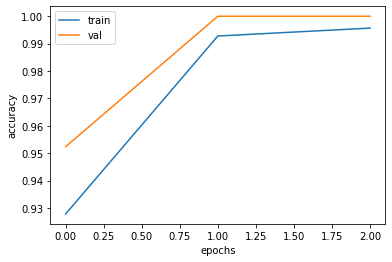

In [30]:
# 학습 정확도
plt.plot(history.history['accuracy'], label='train')         # 훈련 데이터의 정확도
plt.plot(history.history['val_accuracy'], label='val')       # 검증 데이터의 정확도
plt.xlabel('epochs')                                         # x축 레이블 설정
plt.ylabel('accuracy')                                       # y축 레이블 설정
plt.legend()                                                 # 범례 표시

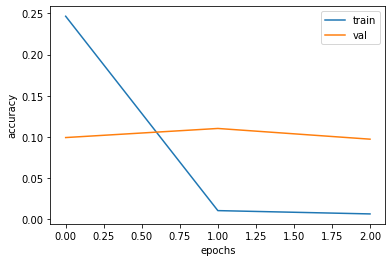

In [34]:
# loss as 손실 그래프
plt.plot(history.history['loss'], label='train')         # 훈련 데이터의 손실
plt.plot(history.history['val_loss'], label='val')       # 검증 데이터의 손실
plt.xlabel('epochs')                                     # x축 레이블 설정
plt.ylabel('accuracy')                                   # y축 레이블 설정
plt.legend()                                             # 범례 표시